<a href="https://colab.research.google.com/github/johanhoffman/DD2363-VT20/blob/kalmroth-lab6/Lab-6/timaslj_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab 6: Differential equations**
**Timas Ljungdahl**

# **Abstract**

In this report, Explicit Euler was implemented for solving initial value problems. 

#**About the code**

A short statement on who is the author of the file, and if the code is distributed under a certain license. 

In [0]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019 Johan Hoffman (jhoffman@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [0]:
# Load neccessary modules.
from google.colab import files

import time
import numpy as np
import unittest
import random
import math

from sympy import * 

from matplotlib import pyplot as plt
from matplotlib import tri
from matplotlib import axes
from mpl_toolkits.mplot3d import Axes3D

# **Introduction**

Initial value problems are differential equations where the function for a specified value, called the initial condition, is known. Intial value problems are problems of the following kind:
$$\dot{u}(t) = f(u(t), t), 0 < t \leq T$$
$$u(t) = u_0$$
where we seek $u(t)$. 

Explicit Euler, which is a time stepping method for solving this kind of problem, constructs an approximation $U(t) \approx u(t)$ by starting at the initial condition and iteratively taking a step in the direction  of the derivative at the previous time step. This can be formulated as following:

$$U_n = U_{n-1} + k_nf(U_{n-1}, t_{n-1})$$  

In the linear scalar case where $\dot{u}(t) = \lambda u(t)$, Explicit Euler is stable if $|1+k\lambda| < 1$, where $k$ is the step length and $\lambda$ is the linear coefficient. 

In the linear system case where the function is a matrix $A$, Explicit Euler is stable if all its eigenvalues are less than 0. 

# **Methods**

The algorithms were implemented following the lecture notes. The stability and accuracy were tested for the scalar case and the system case. 

# **Results**

In [0]:
def explicit_euler(T, f, initVal, step_length):
    time_steps = np.arange(0, T+step_length, step_length)
    U = np.zeros((initVal.size, len(time_steps)))
    U[:,0] = initVal
    for i in range(1, len(time_steps-1)):
        dif = time_steps[i] - time_steps[i-1]
        #print(dif)
        U[:,i] = U[:,i-1] + dif*f(U[:,i-1], time_steps[i-1])

    return time_steps, U

### **Time stepping for scalar initial value problem du/dt = f(u,t)**

The algorithm was tested for a initial value problem where the solution $u$ is known. The output $U$ was then compared with the known solution to verify accuracy. In the scalar case, with $\lambda = a = -1$, the linear model is stable. We also know that the IVP is stable for $k < 2$. To test this we can test the algorithm for different $k$'s and plot the solutions to see if the solutions approaches the equilibirum point $u^* = 0$. $u_0$ is chosen as -5. The $k$'s that were chosen were 0.1, 1 and 2.

.
----------------------------------------------------------------------
Ran 1 test in 0.061s

OK


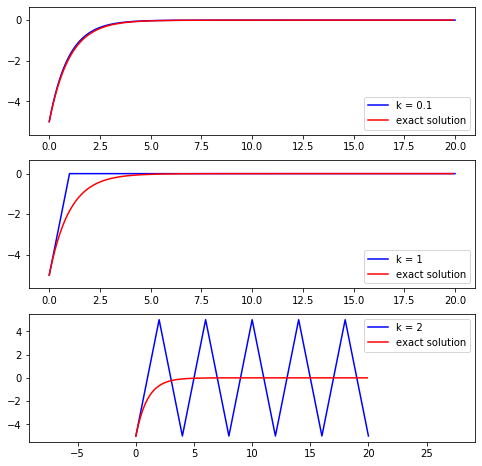

In [102]:
class Test(unittest.TestCase):

    def test_scalar_accuracy_stability(self):
        a = -1
        u0 = -5
        u_dot = lambda u, t: a*u 
        time_steps = np.arange(0, 20, 1e-1)
        exact_sol = [u0*exp(a*t) for t in time_steps]
        k_s = [1e-1, 1, 2]

        U_s = [explicit_euler(20, u_dot, np.array([u0]), k) for k in k_s]

        fig, axs = plt.subplots(3, figsize=(8,8))
        for i,U in enumerate(U_s):
            axs[i].plot(U[0], U[1][0], '-b', label=f"k = {k_s[i]}")
            axs[i].plot(time_steps, exact_sol, '-r', label="exact solution")
            axs[i].axis('equal')
            leg = axs[i].legend()

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

### **Time stepping for a system of  initial value problems du/dt = f(u,t)**

The algorithm was tested analogously to the scalar case. 

.

(array([-0.3, -0.5]), array([[1., 0.],
       [0., 1.]]))



----------------------------------------------------------------------
Ran 1 test in 0.082s

OK


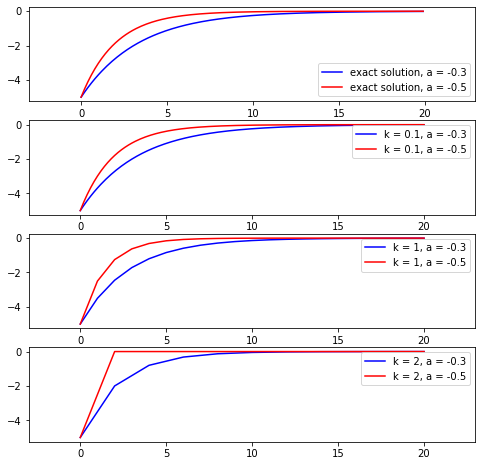

In [103]:
class Test(unittest.TestCase):

    def test_system_accuracy(self):
        A = np.array([
                [-0.3, 0],
                [0, -0.5]
            ])
        time_steps = np.arange(0, 20, 1e-1)
        u0 = np.array([-5,-5])
        exact_sol = [[u0[0]*exp(A[0,0]*t) for t in time_steps], [u0[1]*exp(A[1,1]*t) for t in time_steps]]
        u_dot = lambda u, t: A @ u
        k_s = [1e-1, 1, 2]

        U_s = [explicit_euler(20, u_dot, u0, k) for k in k_s]

        fig, axs = plt.subplots(4, figsize=(8,8))

        axs[0].plot(time_steps, exact_sol[0], '-b', label=f"exact solution, a = {A[0,0]}")
        axs[0].plot(time_steps, exact_sol[1], '-r', label=f"exact solution, a = {A[1,1]}")
        axs[0].axis('equal')
        leg = axs[0].legend()

        for i,U in enumerate(U_s):
            axs[i+1].plot(U[0], U[1][0], '-b', label=f"k = {k_s[i]}, a = {A[0,0]}")
            axs[i+1].plot(U[0], U[1][1], '-r', label=f"k = {k_s[i]}, a = {A[1,1]}")
            axs[i+1].axis('equal')
            leg = axs[i+1].legend()

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

# **Discussion**

For the scalar case, the plots indeed show that the IVP is stable for $a = -1$ for $k$ values $= \{k | 0 < k < 2\}$ since Explicit Euler is stable if $|1+ka| < 1$. We can see that the IVP is stable since the solution approaches the equilibrium point $u^* = 0$ as the time traverses.

For the linear system case, the IVP's are stable if for a matrix $A$, $Re(\lambda_i) < 0$ $\forall i=1,...,N$ where $\lambda_i$ are the eigenvalues of $A$. A diagonal matrix with all negative values has this property which can be seen in the plots. The IVP's are stable since the solutions approach the equilibrium point $u^* = 0$ as the time traverses.

In both cases, the accuracy increases with shorter timesteps which can be seen as the plots of the approximation and the exact solution begin to overlap for lower k values. 

